In [1]:
# 1. Data Collection :

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ifood_df.csv')

# Display the first few rows of the dataset
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [2]:
# 2. Data Exploration and Cleaning :

# Check for missing values
print(df.isnull().sum())

# Flling missing values with the median
df.fillna(df.median(), inplace=True)

# Check data types
print(df.dtypes)

# Detect outliers (using Z-score)
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Filter out rows with Z-scores above 3 (or below -3)
df_outliers_removed = df[(z_scores < 3).all(axis=1)]


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [3]:
# 3. Descriptive Statistics :

# Calculate total spend per customer
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Calculate average purchase value
df['Average_Purchase_Value'] = df['Total_Spend'] / (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

# Calculate purchase frequency
df['Purchase_Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Summarize data
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Spend,Average_Purchase_Value,Purchase_Frequency
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,606.821769,inf,14.887982
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,601.675284,NaN,7.615277
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,5.000000,0.533333,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,69.000000,9.714286,8.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,397.000000,23.388889,15.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,1047.000000,45.533333,21.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,2525.000000,inf,43.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

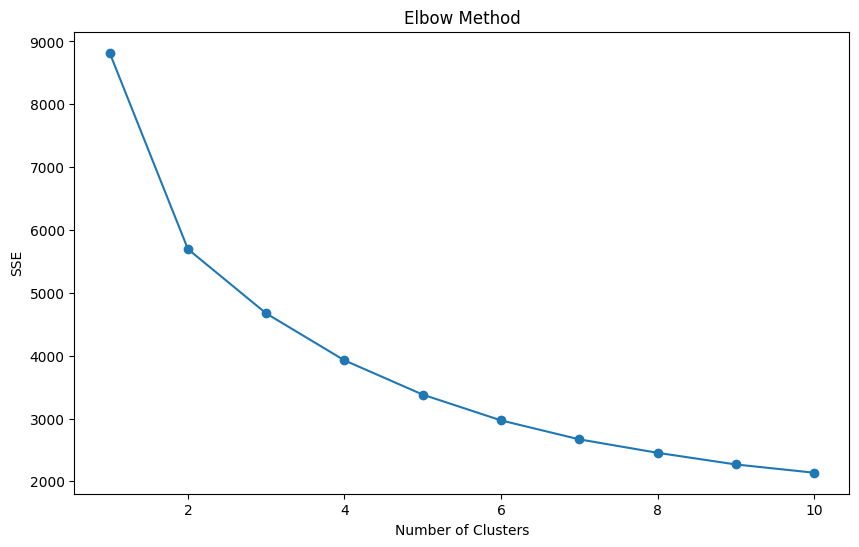

In [4]:
# 4. Customaer Segmentation :

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = ['Income', 'MntTotal', 'Age', 'Recency']

# Check for infinite values and replace them with NaN
df[features] = df[features].replace([np.inf, -np.inf], np.nan)

# Check for NaN values and handle them (fill with the mean or drop)
df[features] = df[features].fillna(df[features].mean())

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


In [5]:
# Perform K-Means clustering with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Show the resulting cluster assignments
print(df[['Income', 'MntTotal', 'Age', 'Recency', 'Cluster']].head())

    Income  MntTotal  Age  Recency  Cluster
0  58138.0      1529   63       58        1
1  46344.0        21   66       38        0
2  71613.0       734   55       26        1
3  26646.0        48   36       26        0
4  58293.0       407   39       94        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


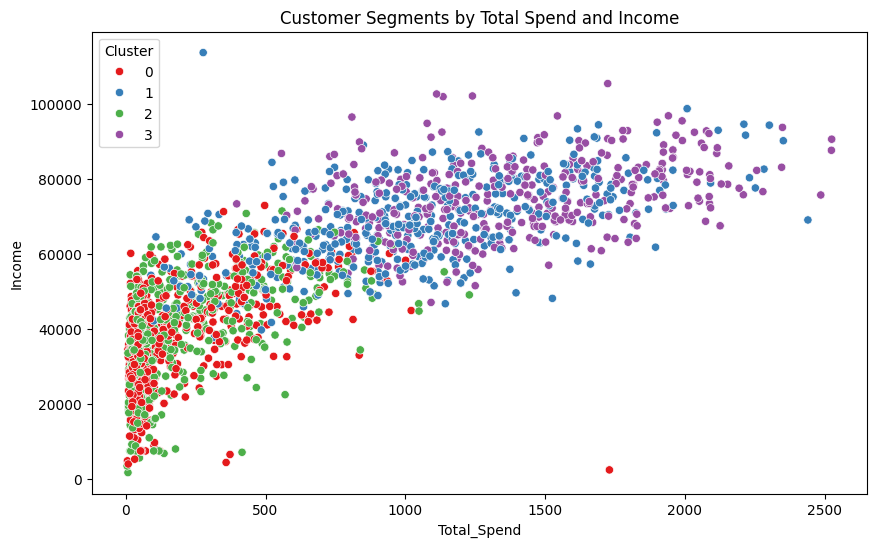

In [6]:
# 5. Visualization :

import seaborn as sns

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total_Spend'], y=df['Income'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segments by Total Spend and Income')
plt.show()


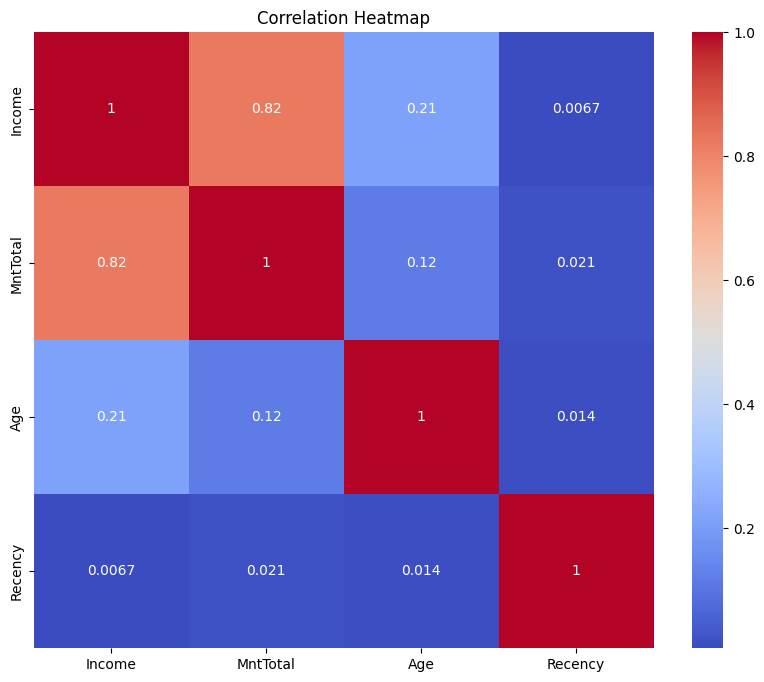

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# 6. Insights :

# Analyze the characteristics of each cluster
for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster} Summary:")
    print(df[df['Cluster'] == cluster][features].describe())
    print("\n")

# Example recommendations:
# Cluster 0 might be high spenders, consider loyalty programs for them.
# Cluster 1 might be low spenders, consider targeted promotions to increase their activity.


Cluster 1 Summary:
              Income     MntTotal         Age     Recency
count     511.000000   511.000000  511.000000  511.000000
mean    68041.465753   959.847358   63.743640   42.929550
std     11284.438435   442.541692    6.584506   26.624972
min     37760.000000    38.000000   49.000000    0.000000
25%     60413.500000   654.000000   59.000000   21.000000
50%     67225.000000   923.000000   64.000000   42.000000
75%     76583.000000  1224.000000   69.000000   63.000000
max    113734.000000  2262.000000   79.000000   98.000000


Cluster 0 Summary:
             Income     MntTotal         Age     Recency
count    646.000000   646.000000  646.000000  646.000000
mean   36332.109907   150.541796   46.842105   24.345201
std    13146.523422   189.478625    9.782748   15.178525
min     2447.000000     5.000000   24.000000    0.000000
25%    26892.000000    32.250000   40.000000   11.000000
50%    35911.000000    61.000000   46.000000   24.000000
75%    45198.000000   221.000000   52.0